#Background
Belakangan ini telah banyak kita saksikan kejadin bencana alam yang besar dan memakan banyak korban, seringkali kita masih memandang hal itu berlangsung karena proses alam dan konsekuensinya yang hanya dapat kita terima. Namun, seiring dengan naiknya angka deforestasi, limbah perusahaan yang mencemari lingkungan sekitar, berton-ton sampah yang melantur di lautan apakah tidak pernah berdampak pada keseimbangan alam ?.

Permasalahan yang disebabkan oleh manusia ini masih belum dianggap serius oleh kita bersama dalam kontribusinya mengganggu keseimbangan alam. Pakistan, negara muslim terdpadat kedua di dunia ini baru saja dilada banjir besar yang menenggelamkan hampir setengah dari wilayahnya. Bencana alam ini disusul dengan krisis pasokan pangan dan saat ini dihadapi dengan ancaman krisis ekonomi serta politik.  

Dilihat dari struktur demografi, Pakistan memiliki median usia penduduk di angka 23 tahun. Menurut para ahli, negara ini diperkirakan mendapat bonus demografi. Dengan kesamaan pola seperti Negara Indonesia, analisis ini perlu dilakukan agar pemerintah sebagai pembuat kebijakan dapat lebih siap menghadapi bonus demografi.

#Objective
*   **Analisis Faktor Pengaruh** Mengembangkan pendekatan analisis data yang efektif untuk mengindentifikasi indikator kependudukan yang dapat memengaruhi luasan wilayah yang terdampak bencana abrasi.
*   **Hubungan Antar Faktor** Melihat bagaimana kaitan antara faktor yang memengaruhi luasan wilayah terdampak bencana abrasi.
*    **Pengelompokan Wilayah** Melakukan pengelompokan wilayah berdasarkan pola demografi yang berdampak pada luasan wilayah terdampak bencana abrasi.

#Data Understanding

Pada project ini data yang digunakan bersumber dari Badan Penanggulangan Bencana Daerah Kabupaten Sambas. Dataset ini mencakup:
1. Data luasan daerah yang terdampak abrasi berdasarkan kelas kerusakannya
2. Total data luasan daerah yang terdampak abrasi
3. Data demografi wilayah yang terdampak abrasi

Berikut adalah tabel dengan nama atribut dan deskripsinya:

| Nama Atribut                        | Deskripsi                                                                                   |
|-------------------------------------|---------------------------------------------------------------------------------------------|
| ID Desa                             | Kode unik yang mengidentifikasi desa                                                        |
| Desa                                | Nama desa                                                                                   |
| Kecamatan                           | Kecamatan tempat desa berada                                                                |
| Rendah                              | Luasan daerah terdampak dengan kerusakan rendah (dalam hektar)                              |
| Sedang                              | Luasan daerah terdampak dengan kerusakan sedang (dalam hektar)                              |
| Tinggi                              | Luasan daerah terdampak dengan kerusakan tinggi (dalam hektar)                              |
| Total Luas (Ha)                     | Total luas daerah yang terdampak (dalam hektar)                                             |
| Kelas                               | Kategori kerusakan secara keseluruhan                                                      |
| Jarak ke Ibu Kota Kabupaten (km)    | Jarak desa ke ibu kota kabupaten (dalam kilometer)                                          |
| Jumlah Penduduk                     | Jumlah penduduk di desa tersebut                                                            |
| Kepadatan Penduduk (jiwa/km²)       | Kepadatan penduduk di desa tersebut (dalam jiwa per kilometer persegi)                      |
| Usia Lansia (60 ke atas)            | Jumlah penduduk berusia 60 tahun ke atas di desa tersebut                                   |
| Usia Anak (0-14 tahun)              | Jumlah penduduk berusia 0-14 tahun di desa tersebut                                         |
| Ibu Hamil                           | Jumlah ibu hamil di desa tersebut                                                           |
| Tingkat Pendidikan (SMA/sederajat)  | Jumlah penduduk dengan tingkat pendidikan setara SMA di desa tersebut                       |

#Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('GelombangAbrasi - a22.csv')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb

#Data Loading

In [56]:
data.head()

,ID Desa,Desa,Kecamatan,Rendah,Sedang,Tinggi,Kelas,Luas Wilayah (Km2),Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Penduduk Terpapar
0,6101032001,Sarang Burung Danau,Jawai,0.00,3.61,55.31,Tinggi,48.20,62,5862,122.0,2869,424,1655,104.0,374,266
1,6101032002,Sungai Nilam,Jawai,0.00,11.00,1.29,Sedang,18.05,57,2407,133.0,1184,172,636,44.0,147,0
2,6101032003,Sarang Burung Kolam,Jawai,0.08,3.67,0.00,Sedang,13.25,58,3404,257.0,1663,331,827,65.0,258,0
3,6101032004,Sarang Burung Usrat,Jawai,0.00,0.06,1.66,Tinggi,14.35,54,4061,283.0,1964,329,1117,74.0,308,0
4,6101032005,Sarang Burung Kuala,Jawai,0.00,0.73,0.00,Sedang,10.85,52,3062,282.0,1496,246,830,57.0,224,0


In [57]:
data = data.drop(['ID Desa','Kecamatan', 'Rendah','Sedang','Tinggi'], axis=1)

In [58]:
data.shape

(32, 12)

In [59]:
data.isnull().sum()

Desa                                  0
Kelas                                 0
Luas Wilayah (Km2)                    0
Jarak ke Ibu Kota Kabupaten (km)      0
Jumlah Penduduk                       0
Kepadatan Penduduk                    0
Perempuan                             0
Usia Lansia (60 ke atas)              0
Usia Anak (0-14 tahun)                0
Ibu Hamil                             2
Tingkat Pendidikan (SMA/sederajat)    0
Penduduk Terpapar                     0
dtype: int64

In [60]:
#menghilangkan missing value
mean_value = data['Ibu Hamil'].mean()
data['Ibu Hamil'] = data['Ibu Hamil'].fillna(mean_value)

In [61]:
data.isna().sum()

Desa                                  0
Kelas                                 0
Luas Wilayah (Km2)                    0
Jarak ke Ibu Kota Kabupaten (km)      0
Jumlah Penduduk                       0
Kepadatan Penduduk                    0
Perempuan                             0
Usia Lansia (60 ke atas)              0
Usia Anak (0-14 tahun)                0
Ibu Hamil                             0
Tingkat Pendidikan (SMA/sederajat)    0
Penduduk Terpapar                     0
dtype: int64

In [62]:
data.duplicated().sum()

0

#Exploratory Data Analysis

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Desa                                32 non-null     object 
 1   Kelas                               32 non-null     object 
 2   Luas Wilayah (Km2)                  32 non-null     float64
 3   Jarak ke Ibu Kota Kabupaten (km)    32 non-null     int64  
 4   Jumlah Penduduk                     32 non-null     int64  
 5   Kepadatan Penduduk                  32 non-null     float64
 6   Perempuan                           32 non-null     int64  
 7   Usia Lansia (60 ke atas)            32 non-null     int64  
 8   Usia Anak (0-14 tahun)              32 non-null     int64  
 9   Ibu Hamil                           32 non-null     float64
 10  Tingkat Pendidikan (SMA/sederajat)  32 non-null     int64  
 11  Penduduk Terpapar                   32 non-null

In [64]:
data.describe()

,Luas Wilayah (Km2),Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Penduduk Terpapar
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,48.911562,53.343750,3465.718750,225.824688,1928.593750,375.218750,1080.281250,78.400000,448.875000,246.625000
std,72.114007,14.113844,2027.427867,184.758076,1007.720995,258.033848,563.429775,39.994032,409.274476,653.660055
min,6.000000,33.000000,970.000000,12.000000,829.000000,112.000000,426.000000,30.000000,74.000000,0.000000
25%,10.825000,45.750000,2188.750000,95.250000,1379.250000,197.750000,727.500000,55.750000,229.750000,0.000000
50%,17.900000,52.000000,3158.000000,208.000000,1634.500000,330.000000,888.000000,71.500000,315.500000,8.000000
75%,49.932500,57.250000,4088.500000,297.750000,2045.250000,431.250000,1228.000000,86.000000,521.500000,148.250000
max,326.210000,109.000000,10615.000000,809.000000,5169.000000,1390.000000,2796.000000,200.000000,2129.000000,3551.000000


In [65]:
num_features = data.drop(['Desa','Kelas'], axis=1)

In [66]:
num_features.shape

(32, 10)

array([[<AxesSubplot:title={'center':'Luas Wilayah (Km2)'}>,
        <AxesSubplot:title={'center':'Jarak ke Ibu Kota Kabupaten (km)'}>,
        <AxesSubplot:title={'center':'Jumlah Penduduk'}>],
       [<AxesSubplot:title={'center':'Kepadatan Penduduk'}>,
        <AxesSubplot:title={'center':'Perempuan'}>,
        <AxesSubplot:title={'center':'Usia Lansia (60 ke atas)'}>],
       [<AxesSubplot:title={'center':'Usia Anak (0-14 tahun)'}>,
        <AxesSubplot:title={'center':'Ibu Hamil'}>,
        <AxesSubplot:title={'center':'Tingkat Pendidikan (SMA/sederajat)'}>],
       [<AxesSubplot:title={'center':'Penduduk Terpapar'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

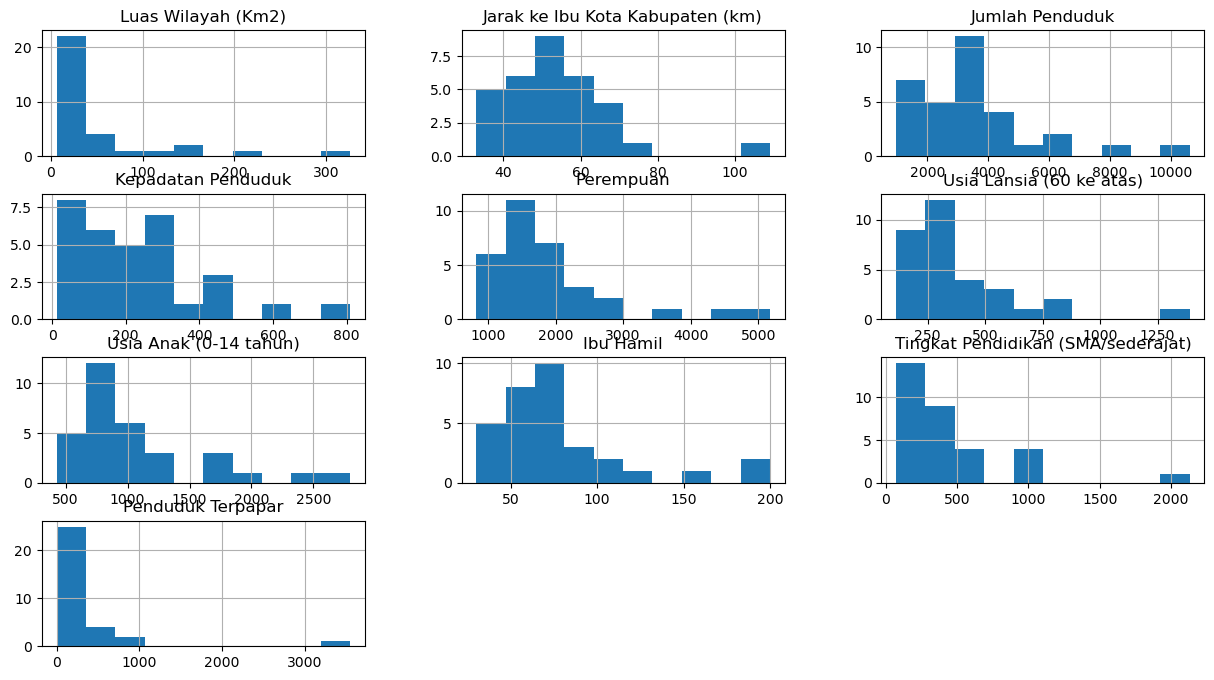

In [67]:
num_features.hist(figsize=(15,8))

In [68]:
num_features.skew()

Luas Wilayah (Km2)                    2.604752
Jarak ke Ibu Kota Kabupaten (km)      1.931120
Jumlah Penduduk                       1.732613
Kepadatan Penduduk                    1.263804
Perempuan                             1.990204
Usia Lansia (60 ke atas)              2.284582
Usia Anak (0-14 tahun)                1.666060
Ibu Hamil                             1.811442
Tingkat Pendidikan (SMA/sederajat)    2.596189
Penduduk Terpapar                     4.476472
dtype: float64

Nilai skewness semua atribut memiliki distribusi **sangat condong ke kanan**, hal ini dikarenakan banyak data yang bernilai kontras. Untuk mengurangi kecondongan data, dilakukan **Logarithmic Transformation** untuk menstabilkan variansi dan mengurangi dampak outliers yang besar.

<AxesSubplot:>

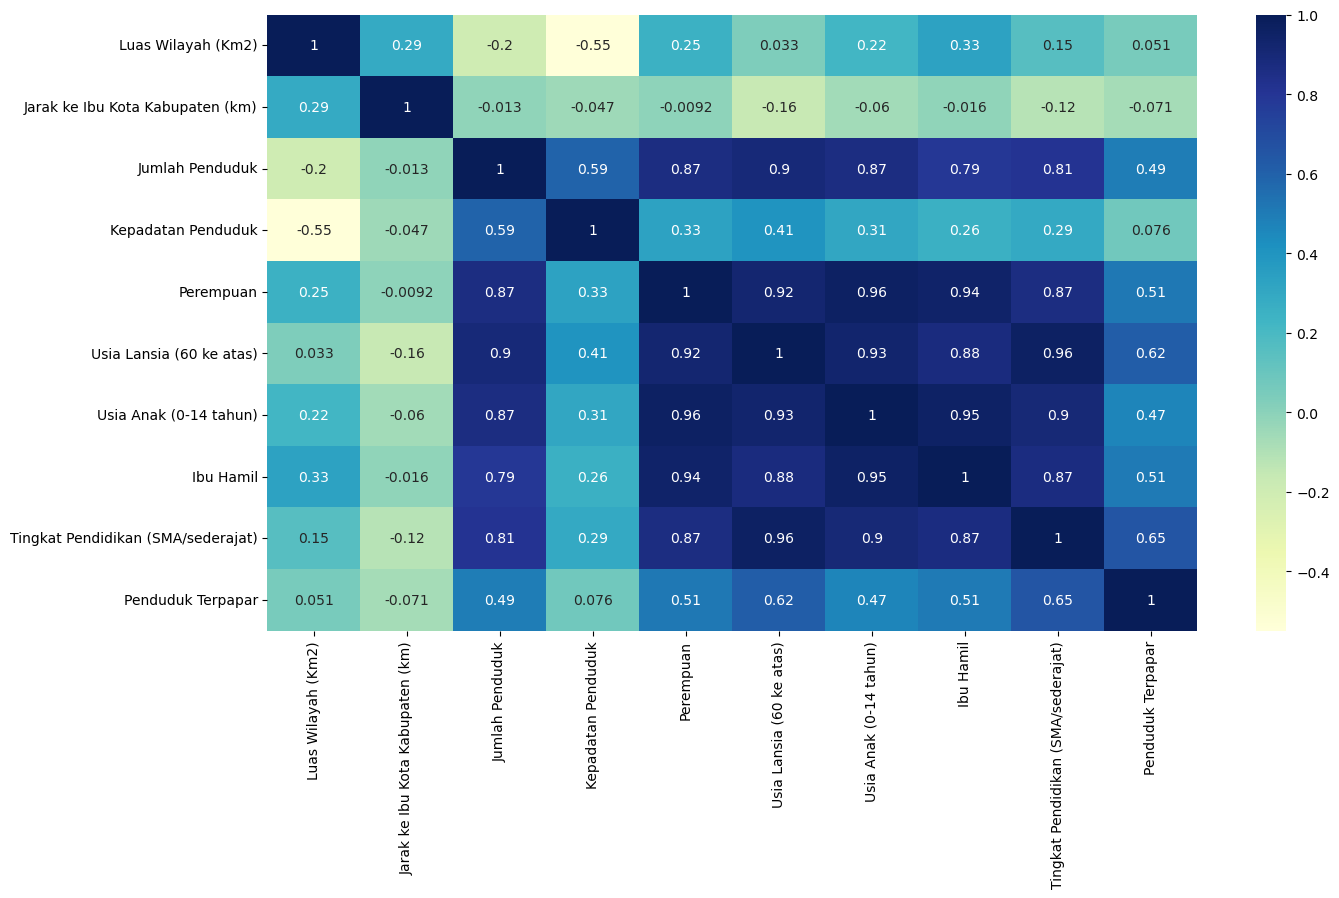

In [69]:
plt.figure(figsize=(15, 8))
sns.heatmap(num_features.corr(), annot=True, cmap="YlGnBu")

Atribut yang memiliki korelasi tinggi dengan `Penduduk Terpapar` adalah:
* Total Luas
* Luas Wilayah
* Ibu Hamil
* Perempuan
* Usia Anak (0-14 Tahun)

## Logarithmic Transformasion

In [71]:
num_features['Luas Wilayah (Km2)'] = np.log(num_features['Luas Wilayah (Km2)'] + 1)
num_features['Jarak ke Ibu Kota Kabupaten (km)'] = np.log(num_features['Jarak ke Ibu Kota Kabupaten (km)'] + 1)
num_features['Jumlah Penduduk'] = np.log(num_features['Jumlah Penduduk'] + 1)
num_features['Kepadatan Penduduk'] = np.log(num_features['Kepadatan Penduduk'] + 1)
num_features['Perempuan'] = np.log(num_features['Perempuan'] + 1)
num_features['Usia Lansia (60 ke atas)'] = np.log(num_features['Usia Lansia (60 ke atas)'] + 1)
num_features['Usia Anak (0-14 tahun)'] = np.log(num_features['Usia Anak (0-14 tahun)'] + 1)
num_features['Ibu Hamil'] = np.log(num_features['Ibu Hamil'] + 1)
num_features['Tingkat Pendidikan (SMA/sederajat)'] = np.log(num_features['Tingkat Pendidikan (SMA/sederajat)'] + 1)
num_features['Penduduk Terpapar'] = np.log(num_features['Penduduk Terpapar'] + 1)

array([[<AxesSubplot:title={'center':'Luas Wilayah (Km2)'}>,
        <AxesSubplot:title={'center':'Jarak ke Ibu Kota Kabupaten (km)'}>,
        <AxesSubplot:title={'center':'Jumlah Penduduk'}>],
       [<AxesSubplot:title={'center':'Kepadatan Penduduk'}>,
        <AxesSubplot:title={'center':'Perempuan'}>,
        <AxesSubplot:title={'center':'Usia Lansia (60 ke atas)'}>],
       [<AxesSubplot:title={'center':'Usia Anak (0-14 tahun)'}>,
        <AxesSubplot:title={'center':'Ibu Hamil'}>,
        <AxesSubplot:title={'center':'Tingkat Pendidikan (SMA/sederajat)'}>],
       [<AxesSubplot:title={'center':'Penduduk Terpapar'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

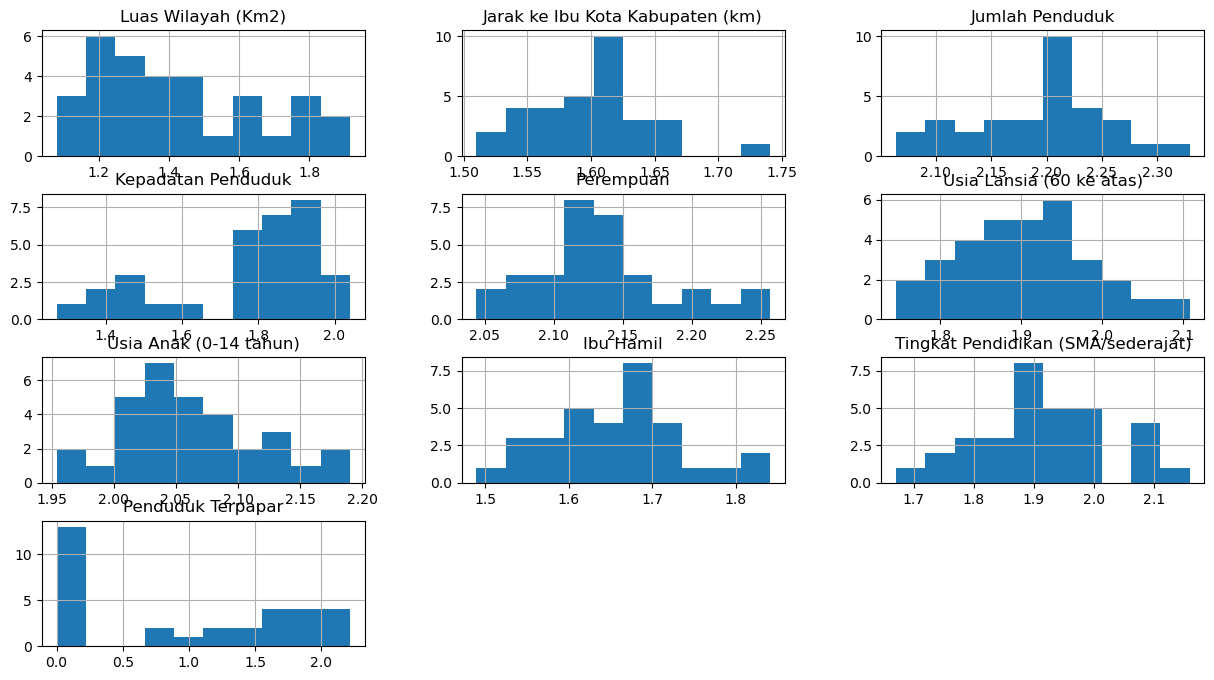

In [72]:
num_features.hist(figsize=(15,8))

In [73]:
num_features.skew()

Luas Wilayah (Km2)                    0.630904
Jarak ke Ibu Kota Kabupaten (km)      0.438239
Jumlah Penduduk                      -0.212705
Kepadatan Penduduk                   -1.051257
Perempuan                             0.748943
Usia Lansia (60 ke atas)              0.171984
Usia Anak (0-14 tahun)                0.445960
Ibu Hamil                             0.332940
Tingkat Pendidikan (SMA/sederajat)   -0.003157
Penduduk Terpapar                    -0.014329
dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_23676\3463269382.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_features['Penduduk Terpapar'], shade=True)


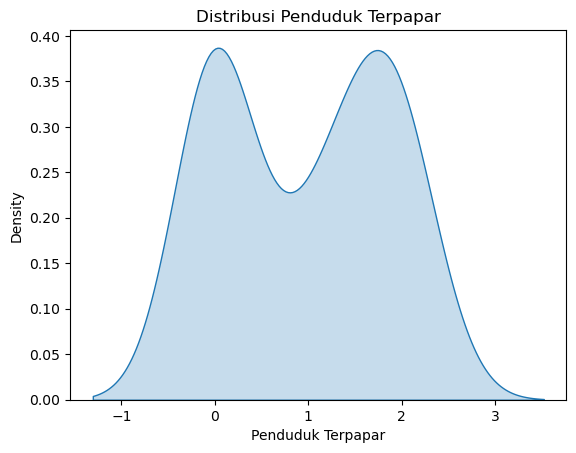

In [74]:
sns.kdeplot(num_features['Penduduk Terpapar'], shade=True)
plt.title('Distribusi Penduduk Terpapar')
plt.xlabel('Penduduk Terpapar')
plt.ylabel('Density')
plt.show()

# Model Development

In [75]:
X = num_features.drop(['Penduduk Terpapar'], axis=1)
y = num_features['Penduduk Terpapar']

## Random Forest Cross Validation

In [76]:
rf = RandomForestRegressor()
param_grid = {
    "n_estimators": [200, 250, 300],
    "max_features": [8, 10, 12],
    "min_samples_split" : [2, 4, 6]
}

rfRegressor = GridSearchCV(
    rf, param_grid, cv=5, scoring="neg_root_mean_squared_error",
    return_train_score=True
)

rfRegressor.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 10, 12],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 250, 300]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [77]:
bestParam = rfRegressor.best_params_

best_rf_model = RandomForestRegressor(
    n_estimators=bestParam['n_estimators'],
    max_features=bestParam['max_features'],
    min_samples_split=bestParam['min_samples_split']
)

best_rf_model.fit(X, y)

RandomForestRegressor(max_features=10, n_estimators=200)

In [78]:
best_rf_model.score(X, y)

0.8874548460407564

In [79]:
y_pred = best_rf_model.predict(X)
df = pd.DataFrame(y_pred, columns=['Predictions'])
print(df)

    Predictions
0      1.660297
1      0.122954
2      0.146541
3      0.049596
4      0.099878
5      0.096716
6      0.148385
7      0.272415
8      0.886935
9      1.001242
10     0.183836
11     0.103635
12     1.797069
13     1.437646
14     0.690932
15     0.521401
16     0.949266
17     0.340382
18     0.939864
19     1.501845
20     0.550283
21     0.410509
22     1.998340
23     1.907789
24     1.447029
25     1.461946
26     1.596495
27     1.599537
28     1.754836
29     1.497175
30     1.372935
31     1.152553


In [80]:
mse_l = mean_squared_error(y, y_pred)
mae_l = mean_absolute_error(y, y_pred)
r2_l = r2_score(y, y_pred)
rmse_l = np.sqrt(mse_l)

print('Evaluasi Model Random Search')
print(f"Mean Squared Error (MSE): {mse_l:.2f}")
print(f"Mean Absolute Error (MAE): {mae_l:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_l:.2f}")
print(f"R²: {rmse_l:.2f}")

Evaluasi Model Random Search
Mean Squared Error (MSE): 0.08
Mean Absolute Error (MAE): 0.23
Root Mean Squared Error (RMSE): 0.29
R²: 0.29


* Nilai MSE sebesar 1.22 menunjukkan bahwa, secara rata-rata, kuadrat kesalahan prediksi model sekitar 1.22. Semakin rendah nilai MSE, semakin baik model dalam memprediksi target.
* Nilai MAE sebesar 0.89 berarti bahwa, secara rata-rata, prediksi model meleset dari nilai sebenarnya sebesar 0.89 unit. MAE lebih intuitif untuk diinterpretasikan karena tidak memberikan bobot lebih pada kesalahan besar, sehingga memberikan gambaran yang lebih realistis tentang kesalahan prediksi.
* Nilai RMSE sebesar 1.10 menunjukkan bahwa, secara rata-rata, prediksi model meleset sekitar 1.10 unit dari nilai sebenarnya. RMSE lebih sensitif terhadap outlier dibandingkan MAE, sehingga memberikan informasi yang baik jika ada nilai ekstrim dalam data.
* Nilai R² sebesar 1.10 menunjukkan bahwa model Anda dapat menjelaskan lebih dari 100% variasi dalam data, yang menunjukkan bahwa model mungkin terlalu baik dalam memprediksi data latih (overfitting) atau ada masalah lain dalam evaluasi.
* Tidak menggunakan evaluasi MAPE karena evaluasi ini sangat sensitif terhadap nilai 0, sedangkan pada data target terdapat banyak nilai 0.

## XGBoost Cross Validation

In [81]:
xg = xgb.XGBRegressor(eval_metric='rmsle')
par_grid = {
    "max_depth": [6, 10, 12],
    "n_estimators": [300, 500, 700],
    "learning_rate": [0.01, 0.015]
}
xgRegressor = GridSearchCV(xg, par_grid, cv=5)
xgRegressor.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmsle', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=Non...one,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.015],
                         'max_depth': [6, 10, 12],
                         'n_estimators': [300, 500, 700]})

In [82]:
bestParamm = xgRegressor.best_params_

best_xg_model = xgb.XGBRegressor(
    max_depth = bestParamm['max_depth'],
    n_estimators = bestParamm['n_estimators'],
    learning_rate = bestParamm['learning_rate']
)

best_xg_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
best_xg_model.score(X, y)

0.9859345295051016

In [84]:
y_predd = best_xg_model.predict(X)
dt = pd.DataFrame(y_predd, columns=['Predictions'])
print(dt)

    Predictions
0      1.764757
1      0.064885
2      0.052852
3      0.051127
4      0.052852
5      0.052852
6      0.051127
7      0.065287
8      0.889646
9      1.211914
10     0.091332
11     0.064885
12     1.970163
13     1.400654
14     0.757715
15     0.234819
16     1.290115
17     0.065287
18     1.223207
19     1.550744
20     0.128959
21     0.128959
22     1.973042
23     1.901943
24     1.763127
25     1.800865
26     1.947323
27     1.970789
28     1.696356
29     1.572983
30     1.572983
31     1.085367


In [85]:
mse_x = mean_squared_error(y, y_predd)
mae_x = mean_absolute_error(y, y_predd)
r2_x = r2_score(y, y_predd)
rmse_x = np.sqrt(mse_x)

print('Evaluasi Model Extreme Gradient Boost')
print(f"Mean Squared Error (MSE): {mse_x:.2f}")
print(f"Mean Absolute Error (MAE): {mae_x:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_x:.2f}")
print(f"R²: {rmse_x:.2f}")

Evaluasi Model Extreme Gradient Boost
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.08
Root Mean Squared Error (RMSE): 0.10
R²: 0.10


* Nilai MSE yang rendah (0.11 dalam kasus ini) menunjukkan bahwa model Anda menghasilkan prediksi yang dekat dengan nilai aktual. Semakin kecil nilai MSE, semakin baik performa model dalam hal ketepatan.
* MAE memberikan gambaran yang jelas tentang rata-rata kesalahan dalam satuan yang sama dengan data asli. Dengan nilai 0.24, ini menunjukkan bahwa, rata-rata, prediksi model Anda menyimpang sekitar 0.24 dari nilai aktual. MAE yang lebih kecil menunjukkan akurasi model yang lebih baik.
* Nilai RMSE sebesar 0.34 menunjukkan seberapa besar kesalahan prediksi rata-rata yang dihasilkan model. RMSE cenderung memberikan lebih banyak bobot pada kesalahan yang lebih besar dibandingkan MAE karena kesalahan dikuadratkan sebelum dihitung rata-ratanya. Nilai yang lebih kecil menunjukkan model yang lebih baik.
* Jika ini adalah RMSE, maka artinya sama dengan nilai RMSE sebelumnya. Jika mengacu pada R-squared, maka nilai 0.34 menunjukkan bahwa sekitar 34% variabilitas data dapat dijelaskan oleh model. Nilai R-squared yang lebih tinggi menunjukkan model yang lebih baik.

# Evaluasi Model

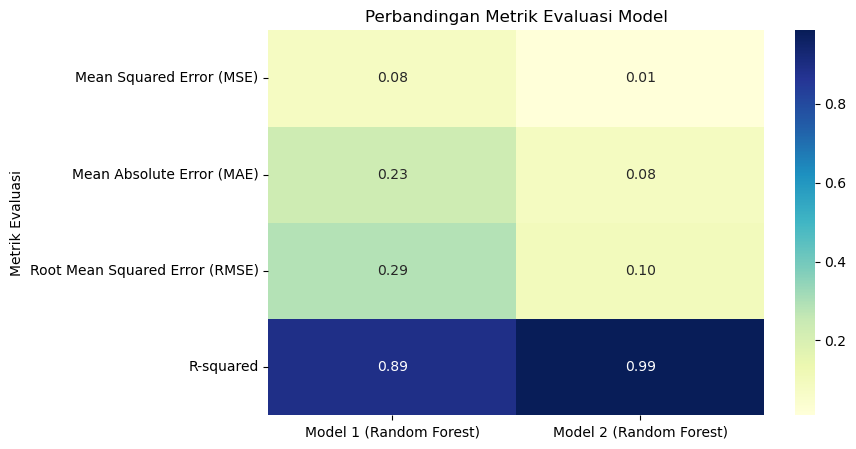

In [86]:
data_evaluasi = {
    "Metrik Evaluasi": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R-squared"],
    "Model 1 (Random Forest)": [mse_l, mae_l, rmse_l, r2_l],
    "Model 2 (Random Forest)": [mse_x, mae_x, rmse_x, r2_x],
}

evaluation_df = pd.DataFrame(data_evaluasi).set_index("Metrik Evaluasi")

plt.figure(figsize=(8, 5))
sns.heatmap(evaluation_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Perbandingan Metrik Evaluasi Model")
plt.show()

# Save Model

In [120]:
import pickle

with open('penduduk.pkl', 'wb') as fileP:
    pickle.dump(best_xg_model, fileP)

with open('penduduk.pkl', 'rb') as fileP:
    loaded_penduduk = pickle.load(fileP)

# Inferences

In [129]:
input = {
    'Luas Wilayah (Km2)': [4820, 1805.0, 1325.0, 1435.0],
    'Jarak ke Ibu Kota Kabupaten (km)': [62, 51, 49, 30.56],
    'Jumlah Penduduk' : [5862, 3476, 901, 1956],
    'Kepadatan Penduduk': [120, 133, 257, 280],
    'Perempuan': [2869, 1567, 457, 1870],
    'Usia Lansia (60 ke atas)': [424, 172, 331, 329],
    'Usia Anak (0-14 tahun)': [1655, 876, 472, 568],
    'Ibu Hamil':[104, 150, 78, 96],
    'Tingkat Pendidikan (SMA/sederajat)': [374, 472, 146, 389],
}

X_new = pd.DataFrame(input)

In [130]:
loaded_penduduk.predict(X_new)

array([1.521756, 1.521756, 1.521756, 1.521756], dtype=float32)